# Supermarket Sales Dataset

Description:
* 1000 rows, 2 parent and 1 child features

Features:
* Branch, City, Customer type, Gender, Product line, Unit price, Month, Date, Time, Quantity, Tax 5%, Total, Payment

Selected parent features:
* Branch, Time

Selected child features:
* Total

Source: https://www.kaggle.com/aungpyaeap/supermarket-sales

In [1]:
import sys
sys.path.append("C:/Users/notes/grab")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sm = pd.read_csv("../data/supermarket.csv")

In [116]:
sm.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [117]:
parent = sm[['Branch', 'Time']]
parent.head()

,Branch,Time
0,A,13:08
1,C,10:29
2,A,13:23
3,A,20:33
4,A,10:37


In [118]:
child = sm[['Total']]
child.head()

,Total
0,548.9715
1,80.2200
2,340.5255
3,489.0480
4,634.3785


In [126]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
t_branch = le.fit_transform(parent['Branch'])
t_time = pd.to_datetime(parent['Time']).dt.hour * 60 + pd.to_datetime(parent['Time']).dt.minute

X = np.append(t_branch[:,np.newaxis], t_time.values[:,np.newaxis], axis=1).astype(np.float32)
y = child.values.astype(np.float32)

X.shape, y.shape

((1000, 2), (1000, 1))

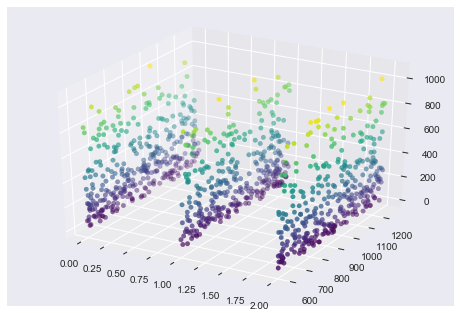

In [128]:
plot_data(X, y)

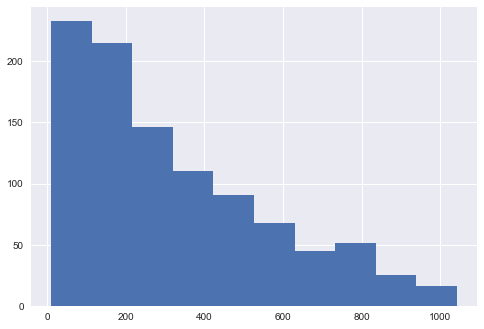

In [132]:
plt.hist(y)
plt.show()

# Model Evaluation

In [135]:
from model.gmm import GMM
from model.cgan import CGAN
from model.bayesnn import BayesNN
from model.mcdropout import MCDropout
from model.deepensemble import DeepEnsemble
from hyperopt.hyperopt import (hyperopt,
                               hyperopt_log,
                               hyperparam_plot,
                               performance_plot)
from visualisation.visualisation import (plot_surface,
                                         plot_prob_fixed,
                                         plot_violin,
                                         plot_prob_violin,
                                         plot_binned_violin)
from data.synthetic import plot_data

# Model: Gaussian Mixture Density Network

[INFO 07-14 14:17:18] ax.modelbridge.dispatch_utils: Using Bayesian Optimization generation strategy: GenerationStrategy(name='Sobol+GPEI', steps=[Sobol for 5 trials, GPEI for subsequent trials]). Iterations after 5 will take longer to generate due to  model-fitting.
[INFO 07-14 14:17:18] ax.service.managed_loop: Started full optimization with 30 steps.
[INFO 07-14 14:17:18] ax.service.managed_loop: Running optimization trial 1...
[INFO 07-14 14:20:19] ax.service.managed_loop: Running optimization trial 2...
[INFO 07-14 14:22:38] ax.service.managed_loop: Running optimization trial 3...
[INFO 07-14 14:24:46] ax.service.managed_loop: Running optimization trial 4...
[INFO 07-14 14:27:12] ax.service.managed_loop: Running optimization trial 5...
[INFO 07-14 14:29:28] ax.service.managed_loop: Running optimization trial 6...
[INFO 07-14 14:32:05] ax.service.managed_loop: Running optimization trial 7...
[INFO 07-14 14:34:39] ax.service.managed_loop: Running optimization trial 8...
[INFO 07-14 

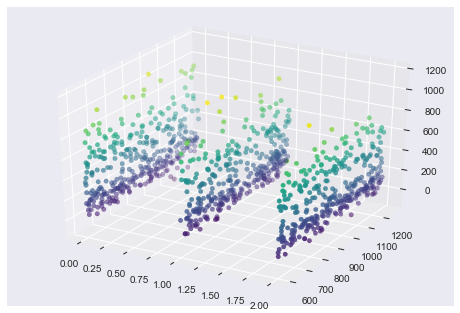

In [137]:
params = {
    "x_features": 2,
    "y_features": 1,
    "epochs": 20000,
}
opt_params = {
    'n_components': [1,100],
    'n_hidden': [1,100],
}

gmm, best_params, best_vals, experiment, exp_model = hyperopt(
    GMM,
    params,
    opt_params,
    X, y,
    trials=30,
    val_split=0.8)

y_hat = gmm.predict(X)
plot_data(X, y_hat)

In [138]:
print(f"n_components: {gmm.n_components}")
print(f"n_hidden: {gmm.n_hidden}")
display(hyperopt_log(experiment))
hyperparam_plot(exp_model, "n_components", "n_hidden")

n_components: 47
n_hidden: 75


,n_components,n_hidden,loss,fKL,rKL,JS
0,90,61,6.915235,0.219541,0.011938,0.028335
1,46,70,6.778499,0.050282,-0.036023,0.001779
2,24,63,6.915236,0.263734,0.008395,0.033075
3,46,35,6.915236,0.210703,0.005476,0.026526
4,46,16,6.913817,0.234325,-0.034099,0.024671
5,51,83,6.915235,0.234991,0.007724,0.029748
6,51,66,6.915235,0.230090,-0.020457,0.025741
7,44,77,6.915244,0.230720,-0.018025,0.026115
8,42,71,6.915244,0.210055,-0.016819,0.023837
9,47,75,6.778499,0.042047,-0.020728,0.002655


[ERROR 07-14 15:32:35] PlotHelper: Have observations of arms with different features but same name. Arbitrary one will be plotted.


In [139]:
from performance.performance import prob_overlap, kl, js
p, q = prob_overlap(y, y_hat, bins=5)
print("fKL:", kl(p, q))
print("rKL:", kl(q, p))
print("JS:", js(p, q))

fKL: 0.0353031903246227
rKL: -0.008655561638647554
JS: 0.0033195316883827854


# Model: Conditional Generative Adversarial Network

[INFO 07-14 15:32:36] ax.modelbridge.dispatch_utils: Using Bayesian Optimization generation strategy: GenerationStrategy(name='Sobol+GPEI', steps=[Sobol for 7 trials, GPEI for subsequent trials]). Iterations after 7 will take longer to generate due to  model-fitting.
[INFO 07-14 15:32:36] ax.service.managed_loop: Started full optimization with 30 steps.
[INFO 07-14 15:32:36] ax.service.managed_loop: Running optimization trial 1...
[INFO 07-14 15:36:18] ax.service.managed_loop: Running optimization trial 2...
[INFO 07-14 15:39:41] ax.service.managed_loop: Running optimization trial 3...
[INFO 07-14 15:43:30] ax.service.managed_loop: Running optimization trial 4...
[INFO 07-14 15:46:48] ax.service.managed_loop: Running optimization trial 5...
[INFO 07-14 15:51:15] ax.service.managed_loop: Running optimization trial 6...
[INFO 07-14 15:54:27] ax.service.managed_loop: Running optimization trial 7...
[INFO 07-14 15:58:41] ax.service.managed_loop: Running optimization trial 8...
[INFO 07-14 

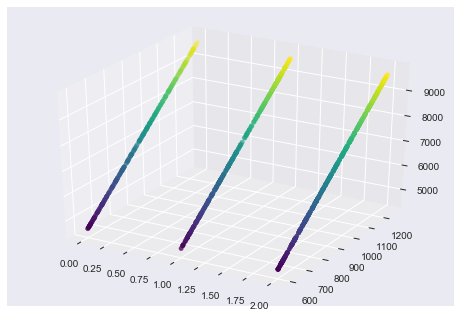

In [140]:
params = {
    "x_features": 2,
    "y_features": 1,
    "epochs": 20000,
}
opt_params = {
    'latent_dim': [1,100],
    'g_hidden': [1,100],
    'd_hidden': [1,100],
    'label_smooth': [0.0,1.0],
    'd_dropout': [0.0, 0.9],
    'gp_weight': [0.0, 1.0],
    'ds_weight': [0.0, 1.0],
}

cgan, best_params, best_vals, experiment, exp_model = hyperopt(
    CGAN,
    params,
    opt_params,
    X, y,
    trials=30,
    val_split=0.8)

y_hat = cgan.predict(X)
plot_data(X, y_hat)

In [141]:
print(f"latent_dim: {cgan.latent_dim}")
print(f"g_hidden: {cgan.g_hidden}")
print(f"d_hidden: {cgan.d_hidden}")
print(f"label_smooth: {cgan.label_smooth}")
print(f"d_dropout: {cgan.d_dropout}")
print(f"gp_weight: {cgan.gp_weight}")
print(f"ds_weight: {cgan.ds_weight}")

display(hyperopt_log(experiment))
hyperparam_plot(exp_model, "g_hidden", "d_hidden")
hyperparam_plot(exp_model, "label_smooth", "d_dropout")
hyperparam_plot(exp_model, "gp_weight", "ds_weight")

latent_dim: 60
g_hidden: 66
d_hidden: 1
label_smooth: 0.6114115995353694
d_dropout: 0.872348515150175
gp_weight: 0.47008082961047926
ds_weight: 0.43386671107863384


,latent_dim,g_hidden,d_hidden,label_smooth,d_dropout,gp_weight,ds_weight,loss,fKL,rKL,JS
0,94,97,4,0.556628,0.460666,0.437673,0.162418,1.813399e+05,-0.225618,0.379464,0.019023
1,29,8,62,0.928498,0.768926,0.364289,0.640523,1.208631e+07,0.310145,0.954505,0.147711
2,48,50,39,0.303257,0.281680,0.898127,0.841137,1.330624e+07,-0.359727,0.802962,0.053962
3,46,8,53,0.546660,0.298421,0.904968,0.468031,2.395155e+07,-0.179772,0.433260,0.031244
4,66,77,94,0.012458,0.155193,0.234296,0.131599,7.301961e+07,-0.042881,0.047188,0.000538
5,21,20,26,0.679891,0.602394,0.843676,0.994250,5.808338e+06,-0.205864,0.410963,0.025077
6,12,77,43,0.264099,0.669028,0.207896,0.801775,1.607412e+07,-0.359727,0.802962,0.053962
7,82,87,1,0.620760,0.528568,0.532686,0.367284,2.244054e+04,0.000000,0.000000,0.000000
8,92,97,1,0.766978,0.621069,0.429680,0.215019,2.704573e+02,0.000000,0.000000,0.000000
9,100,100,1,0.701749,0.501947,0.656809,0.260738,2.124131e+03,0.000000,0.000000,0.000000


In [142]:
from performance.performance import prob_overlap, kl, js
p, q = prob_overlap(y, y_hat, bins=5)
print("fKL:", kl(p, q))
print("rKL:", kl(q, p))
print("JS:", js(p, q))

fKL: 0.0
rKL: 0.0
JS: 0.0


# Model: Bayesian Neural Network

[INFO 07-14 17:11:02] ax.modelbridge.dispatch_utils: Using Bayesian Optimization generation strategy: GenerationStrategy(name='Sobol+GPEI', steps=[Sobol for 5 trials, GPEI for subsequent trials]). Iterations after 5 will take longer to generate due to  model-fitting.
[INFO 07-14 17:11:02] ax.service.managed_loop: Started full optimization with 30 steps.
[INFO 07-14 17:11:02] ax.service.managed_loop: Running optimization trial 1...
[INFO 07-14 17:12:59] ax.service.managed_loop: Running optimization trial 2...
[INFO 07-14 17:15:07] ax.service.managed_loop: Running optimization trial 3...
[INFO 07-14 17:17:55] ax.service.managed_loop: Running optimization trial 4...
[INFO 07-14 17:19:39] ax.service.managed_loop: Running optimization trial 5...
[INFO 07-14 17:21:27] ax.service.managed_loop: Running optimization trial 6...
[INFO 07-14 17:23:08] ax.service.managed_loop: Running optimization trial 7...
[INFO 07-14 17:25:04] ax.service.managed_loop: Running optimization trial 8...
[INFO 07-14 

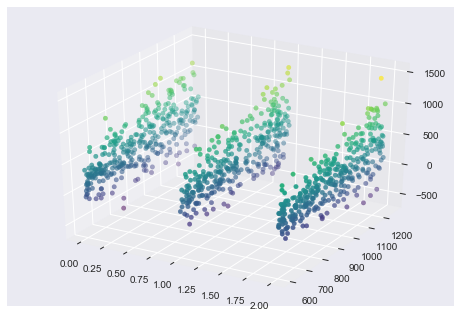

In [143]:
from model.bayesnn import BayesNN
from hyperopt.hyperopt import hyperopt
from hyperopt.hyperopt import hyperopt_log, hyperparam_plot, performance_plot

params = {
    "x_features": 2,
    "y_features": 1,
    "epochs": 2000,
}
opt_params = {
    'n_hidden': [1,100],
    'n_layers': [1,10],
}

bayesnn, best_params, best_vals, experiment, exp_model = hyperopt(
    BayesNN,
    params,
    opt_params,
    X, y,
    trials=30,
    val_split=0.8)

y_hat = bayesnn.predict(X)
plot_data(X, y_hat)

In [144]:
print(f"n_hidden: {bayesnn.n_hidden}")
print(f"n_layers: {bayesnn.n_layers}")

display(hyperopt_log(experiment))
hyperparam_plot(exp_model, "n_hidden", "n_layers")

n_hidden: 1
n_layers: 10


,n_hidden,n_layers,loss,fKL,rKL,JS
0,41,8,7.445362,0.763266,-0.343574,0.050863
1,21,10,7.599792,0.833566,-0.356581,0.057795
2,77,8,7.562082,0.865765,-0.347812,0.062294
3,21,8,7.392893,0.492990,-0.254600,0.029169
4,6,10,7.029980,0.243268,-0.045176,0.024263
5,1,9,7.049453,0.235227,-0.064449,0.020956
6,1,10,6.953147,0.228361,-0.017345,0.025583
7,15,3,7.034808,0.240898,-0.053467,0.023006
8,30,1,7.024172,0.214944,-0.081295,0.016471
9,3,1,7.027097,0.250288,-0.062330,0.023072


[ERROR 07-14 18:06:42] PlotHelper: Have observations of arms with different features but same name. Arbitrary one will be plotted.


In [145]:
from performance.performance import prob_overlap, kl, js
p, q = prob_overlap(y, y_hat, bins=5)
print("fKL:", kl(p, q))
print("rKL:", kl(q, p))
print("JS:", js(p, q))

fKL: 0.23086860636090012
rKL: -0.07487930065884624
JS: 0.019167933483686804


# Model: Monte Carlo Dropout

[INFO 07-14 18:06:44] ax.modelbridge.dispatch_utils: Using Bayesian Optimization generation strategy: GenerationStrategy(name='Sobol+GPEI', steps=[Sobol for 5 trials, GPEI for subsequent trials]). Iterations after 5 will take longer to generate due to  model-fitting.
[INFO 07-14 18:06:44] ax.service.managed_loop: Started full optimization with 30 steps.
[INFO 07-14 18:06:44] ax.service.managed_loop: Running optimization trial 1...
[INFO 07-14 18:07:24] ax.service.managed_loop: Running optimization trial 2...
[INFO 07-14 18:08:04] ax.service.managed_loop: Running optimization trial 3...
[INFO 07-14 18:08:43] ax.service.managed_loop: Running optimization trial 4...
[INFO 07-14 18:09:28] ax.service.managed_loop: Running optimization trial 5...
[INFO 07-14 18:10:05] ax.service.managed_loop: Running optimization trial 6...
[INFO 07-14 18:10:42] ax.service.managed_loop: Running optimization trial 7...
[INFO 07-14 18:11:23] ax.service.managed_loop: Running optimization trial 8...
[INFO 07-14 

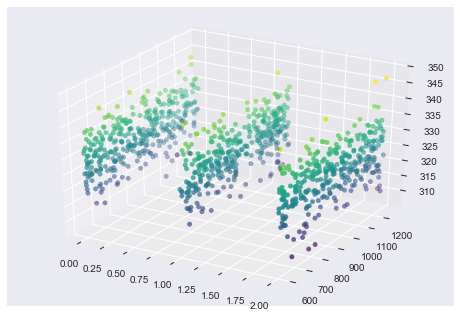

In [146]:
from model.mcdropout import MCDropout
from hyperopt.hyperopt import hyperopt
from hyperopt.hyperopt import hyperopt_log, hyperparam_plot, performance_plot

params = {
    "x_features": 2,
    "y_features": 1,
    "epochs": 2000,
}
opt_params = {
    'n_hidden': [1,100],
    'dropout': [0.1,0.9],
}

mcdropout, best_params, best_vals, experiment, exp_model = hyperopt(
    MCDropout,
    params,
    opt_params,
    X, y,
    trials=30,
    val_split=0.8)

y_hat, y_std = mcdropout.predict(X, return_std=True)
y_hat = mcdropout.predict(X)
plot_data(X, y_hat)

In [147]:
print(f"n_hidden: {mcdropout.n_hidden}")
print(f"dropout: {mcdropout.dropout}")

display(hyperopt_log(experiment))
hyperparam_plot(exp_model, "n_hidden", "dropout")

n_hidden: 56
dropout: 0.10000000000000005


,n_hidden,dropout,loss,fKL,rKL,JS
0,56,0.319311,6.001470,-0.348820,1.362578,0.117745
1,44,0.273340,6.007669,-0.348820,1.362578,0.117745
2,28,0.306721,6.007020,-0.348820,1.362578,0.117745
3,78,0.780123,6.083584,-0.344675,0.924462,0.069283
4,24,0.805665,6.018188,1.073481,0.916113,0.191943
5,1,0.554637,6.363493,-0.359727,0.802962,0.053962
6,27,0.900000,6.094097,-0.245715,0.352947,0.013324
7,100,0.278312,5.999369,-0.348820,1.362578,0.117745
8,100,0.155685,6.002183,-0.348820,1.362578,0.117745
9,39,0.100000,6.007333,-0.348820,1.362578,0.117745


In [152]:
from performance.performance import prob_overlap, kl, js
y_hat = mcdropout.predict(X)
p, q = prob_overlap(y, y_hat, bins=5)
print("fKL:", kl(p, q))
print("rKL:", kl(q, p))
print("JS:", js(p, q))

fKL: -0.34881992563265907
rKL: 1.3625778345025745
JS: 0.11774512784242377


# Model: Deep Ensemble

[INFO 07-14 18:30:25] ax.modelbridge.dispatch_utils: Using Bayesian Optimization generation strategy: GenerationStrategy(name='Sobol+GPEI', steps=[Sobol for 5 trials, GPEI for subsequent trials]). Iterations after 5 will take longer to generate due to  model-fitting.
[INFO 07-14 18:30:25] ax.service.managed_loop: Started full optimization with 30 steps.
[INFO 07-14 18:30:25] ax.service.managed_loop: Running optimization trial 1...
[INFO 07-14 18:32:17] ax.service.managed_loop: Running optimization trial 2...
[INFO 07-14 18:34:20] ax.service.managed_loop: Running optimization trial 3...
[INFO 07-14 18:36:23] ax.service.managed_loop: Running optimization trial 4...
[INFO 07-14 18:38:01] ax.service.managed_loop: Running optimization trial 5...
[INFO 07-14 18:39:39] ax.service.managed_loop: Running optimization trial 6...
[INFO 07-14 18:39:39] StandardizeY: Outcome fKL is constant, within tolerance.
[INFO 07-14 18:39:39] StandardizeY: Outcome rKL is constant, within tolerance.
[INFO 07-14 

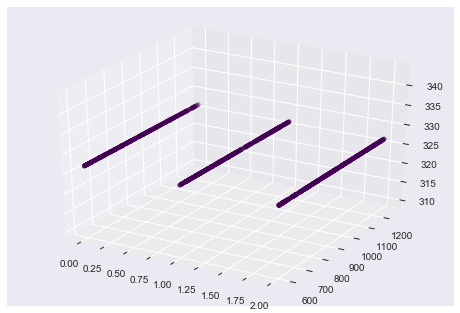

In [149]:
from model.deepensemble import DeepEnsemble
from hyperopt.hyperopt import hyperopt
from hyperopt.hyperopt import hyperopt_log, hyperparam_plot, performance_plot

params = {
    "x_features": 2,
    "y_features": 1,
    "epochs": 2000,
}
opt_params = {
    'n_hidden': [1,100],
    'dropout': [0.1,0.5],
}

deepensemble, best_params, best_vals, experiment, exp_model = hyperopt(
    DeepEnsemble,
    params,
    opt_params,
    X, y,
    trials=30,
    val_split=0.8)

y_hat, y_std = deepensemble.predict(X, return_std=True)
plot_data(X, y_hat)

In [150]:
print(f"n_hidden: {deepensemble.n_hidden}")
print(f"dropout: {deepensemble.dropout}")

display(hyperopt_log(experiment))
hyperparam_plot(exp_model, "n_hidden", "dropout")

n_hidden: 100
dropout: 0.10000000000000005


,n_hidden,dropout,loss,fKL,rKL,JS
0,19,0.220291,6.006454,-0.348820,1.362578,0.117745
1,29,0.160401,6.001583,-0.348820,1.362578,0.117745
2,95,0.176649,6.005825,-0.348820,1.362578,0.117745
3,27,0.472500,6.010295,-0.348820,1.362578,0.117745
4,57,0.185020,6.003603,-0.348820,1.362578,0.117745
5,34,0.116530,6.002584,-0.348820,1.362578,0.117745
6,6,0.137462,6.162203,-0.359727,0.802962,0.053962
7,31,0.282809,6.012752,-0.348820,1.362578,0.117745
8,76,0.113575,6.002326,-0.348820,1.362578,0.117745
9,52,0.100000,6.003006,-0.348820,1.362578,0.117745


In [153]:
from performance.performance import prob_overlap, kl, js
y_hat, y_std = deepensemble.predict(X, return_std=True)
p, q = prob_overlap(y, y_hat, bins=5)
print("fKL:", kl(p, q))
print("rKL:", kl(q, p))
print("JS:", js(p, q))

fKL: -0.34881992563265907
rKL: 1.3625778345025745
JS: 0.11774512784242377
